Vocational training in Germany is traditional started  after 10 years of school at the age of 16 and lasts 3 years. It's organised in a dual system: Trainees spend time in school and in their training company. By this, they learn their profession both in theory and practice. 

For this report, we look at data from Berlin and Brandenburg. Both federal states are in the Northeast of Germany, Berlin being surrounded by Brandenburg. In terms of their demographics, both are very different: with Berlin attracting a young, urban population and Brandenburg suffering from overaging society, apart from cities like Potsdam and Frankfurt (Oder). Berlin has approx. 3.8 million inhabitants, Brandenburg 2.5 million. Data on vocational training are gathered from the [Amt fuer Statistik Berlin Brandenburg](https://www.statistik-berlin-brandenburg.de/BasisZeitreiheGrafik/Bas-Berufsbildung.asp?Ptyp=300&Sageb=21002&creg=BBB&anzwer=6), the office for statistics Berlin Brandenburg.

In [73]:
#Import Pandas and NumPy

import pandas as pd
import numpy as np

In [31]:
#Load the data 

voc_training=pd.read_csv('Voc_training.csv', encoding="latin1", sep=';')
voc_training.head()

,Bundesland,Ausbildungsbereich,Geschlecht,Auszubildende Alter,2018,2017,2016,2015,2014,2013,2012
0,Land Berlin,Industrie und Handel,männlich,15 und jünger,1,3,2,4,2,2,3
1,Land Berlin,Industrie und Handel,männlich,16,335,264,317,315,223,229,233
2,Land Berlin,Industrie und Handel,männlich,17,795,815,786,662,705,803,773
3,Land Berlin,Industrie und Handel,männlich,18,1504,1372,1220,1216,1305,1262,1251
4,Land Berlin,Industrie und Handel,männlich,19,1819,1717,1692,1796,1653,1678,1759


In [77]:
#Get summary statistics

np.unique(voc_training['Ausbildungsbereich'])
np.unique(voc_training['Auszubildende Alter'])

array(['15 und jünger', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31 und älter'],
      dtype=object)

We have data on 7 years, from 2012 to 2018, on the number of people in vocational training. Information about their location (of the school and company), the area of business, gender and age category are given. 

Areas of business are 'Free professions', which compromised mainly of assistents to the free professions as tax advisers, doctors and lawyers. 'Handwerk' comprises handcraft professions, 'Hauswirtschaft' translates to housekeeping, 'Agriculture' means 'Landwirtschaft', 'Oeffentlicher Dienst' to 'Administration'and 'Industrie und Handel' to 'Industry and Trade'. 

Age is given in categories: '15 and younge' as well as '31 and above' comprise more than one year. 

Gender is given only binary as male and female. The additional gender entry 'divers' is in use only after 2018. 

In [32]:
#Transforming from wide to long format

voc_training["id"] = voc_training.index

print(voc_training.keys()[0:4])

voc_training_long=pd.wide_to_long(voc_training, stubnames=['20'], 
                                  i='id', 
                                  j='year')
voc_training_long.head(n=10)

#Renaming the '20'column to a meaningful name, 'Anzahl', which means number 

voc_training_long.rename(columns={'20':'Anzahl'}, inplace=True)
voc_training_long.head(n=10)

Index(['Bundesland', 'Ausbildungsbereich', 'Geschlecht',
       'Auszubildende Alter'],
      dtype='object')


,,Auszubildende Alter,Ausbildungsbereich,Bundesland,Geschlecht,Anzahl
id,year,,,,,
0,18,15 und jünger,Industrie und Handel,Land Berlin,männlich,1
1,18,16,Industrie und Handel,Land Berlin,männlich,335
2,18,17,Industrie und Handel,Land Berlin,männlich,795
3,18,18,Industrie und Handel,Land Berlin,männlich,1504
4,18,19,Industrie und Handel,Land Berlin,männlich,1819
5,18,20,Industrie und Handel,Land Berlin,männlich,1945
6,18,21,Industrie und Handel,Land Berlin,männlich,1805
7,18,22,Industrie und Handel,Land Berlin,männlich,1378
8,18,23,Industrie und Handel,Land Berlin,männlich,991


To tidy the data, the original dataframe is transferred from wide to long. As a next step, missing data are expressed as zero rather NA. 

In [33]:
#Change strings '-' to Zero  

voc_training_long['Anzahl'].loc[voc_training_long['Anzahl']=='-']='0'
voc_training_long['Anzahl'].loc[voc_training_long['Anzahl']=='0']

id   year
17   18      0
68   18      0
85   18      0
102  18      0
119  18      0
            ..
389  12      0
390  12      0
391  12      0
392  12      0
406  12      0
Name: Anzahl, Length: 258, dtype: object

We can now distinguish between the different years and how things changed. 

In [34]:
#Cast to numeric 

print(voc_training_long['Anzahl'].dtype)
voc_training_long=voc_training_long.astype({'Anzahl': 'float'})

summed_up_people=voc_training_long.groupby(['year', 'Bundesland'])[['Anzahl']].sum()
print(summed_up_people)

object
                        Anzahl
year Bundesland               
12   Land Berlin       44682.0
     Land Brandenburg  30045.0
13   Land Berlin       42030.0
     Land Brandenburg  27338.0
14   Land Berlin       40496.0
     Land Brandenburg  26265.0
15   Land Berlin       39342.0
     Land Brandenburg  26017.0
16   Land Berlin       38633.0
     Land Brandenburg  25876.0
17   Land Berlin       38432.0
     Land Brandenburg  25946.0
18   Land Berlin       38649.0
     Land Brandenburg  26159.0


In [37]:
#Create a subset that is only containing data from Berlin 
summed_up_people=summed_up_people.reset_index()
summed_up_people_berlin=summed_up_people.loc[summed_up_people['Bundesland']=='Land Berlin']
summed_up_people_brb=summed_up_people.loc[summed_up_people['Bundesland']=='Land Brandenburg']

print(summed_up_people_berlin)

    level_0  index  year   Bundesland   Anzahl
0         0      0    12  Land Berlin  44682.0
2         2      2    13  Land Berlin  42030.0
4         4      4    14  Land Berlin  40496.0
6         6      6    15  Land Berlin  39342.0
8         8      8    16  Land Berlin  38633.0
10       10     10    17  Land Berlin  38432.0
12       12     12    18  Land Berlin  38649.0


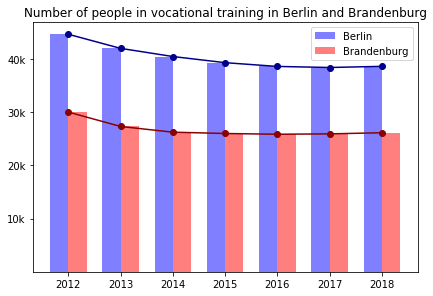

In [38]:
# Create a chart that compares number of vocational training numbers in both regions 

import numpy as np
import matplotlib.pyplot as plt

#Set a bar width
bar_width=0.35

#Create bar charts for the different Bundeslaender
rectangle_berlin=plt.bar(summed_up_people_berlin['year'],
                        summed_up_people_berlin['Anzahl'], 
                        bar_width, 
                         color='b',
                        label='Berlin', 
                        alpha=0.5)

rectangle_brb=plt.bar(summed_up_people_brb['year']+bar_width,
                        summed_up_people_brb['Anzahl'], 
                        bar_width, 
                      color='r', 
                        label='Brandenburg', 
                        alpha=0.5)

# Add additional line plots to show trend
plt.plot(summed_up_people_berlin['year']+bar_width/2, summed_up_people_berlin['Anzahl'], color='darkblue', marker='o', 
        label='_nolegend_')
plt.plot(summed_up_people_brb['year']+bar_width/2, summed_up_people_brb['Anzahl'], color='darkred', marker='o', 
        label='_nolegend_')

#Adjust the x axis labels 
plt.xticks(summed_up_people_brb['year'] + bar_width / 2, ('2012', '2013', '2014', '2015', '2016', '2017', '2018'))
plt.yticks([10000, 20000, 30000, 40000], ('10k', '20k', '30k', '40k'))

#Show the plot 
plt.legend()
plt.tight_layout()
plt.title('Number of people in vocational training in Berlin and Brandenburg')
plt.show()

In [39]:
#Show differences between sexes and type of vocational training 

numbers_by_sex_and_age=voc_training_long.groupby(['Geschlecht', 'Auszubildende Alter'])[['Anzahl']].sum()

numbers_by_sex_and_age=numbers_by_sex_and_age.reset_index()

numbers_by_sex_and_age.head()

,Geschlecht,Auszubildende Alter,Anzahl
0,männlich,15 und jünger,44.0
1,männlich,16,8986.0
2,männlich,17,23760.0
3,männlich,18,35347.0
4,männlich,19,40840.0


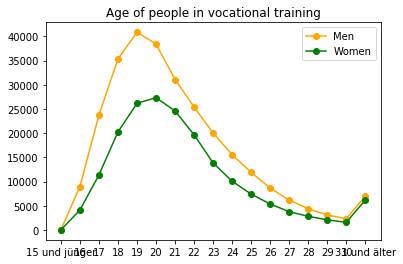

In [78]:
# Compare the age of men and women in the data 

plt.plot(numbers_by_sex_and_age[numbers_by_sex_and_age['Geschlecht']=='männlich']['Auszubildende Alter'], 
        numbers_by_sex_and_age[numbers_by_sex_and_age['Geschlecht']=='männlich']['Anzahl'], 
        color='orange', marker='o', label='Men')

plt.plot(numbers_by_sex_and_age[numbers_by_sex_and_age['Geschlecht']=='weiblich']['Auszubildende Alter'], 
        numbers_by_sex_and_age[numbers_by_sex_and_age['Geschlecht']=='weiblich']['Anzahl'], 
        color='green', marker='o', label='Women')
plt.title('Age of people in vocational training')
plt.legend()

plt.show()

This particular graph leads to double counting: We are summarizing across years. Someone who started his vocational training in 2014 as 16 year old, counts in 2015 as 17 year old and in 2016 as 18 years old and would then most likely drop out of the statistic as the training is finished. From the original database, numbers on the year of traineeship are available. It would be useful to consider this information and to filter down for the first year of training for example. This would lead to better understanding of when a training is started and would clearly avoid the problem of double counting. 

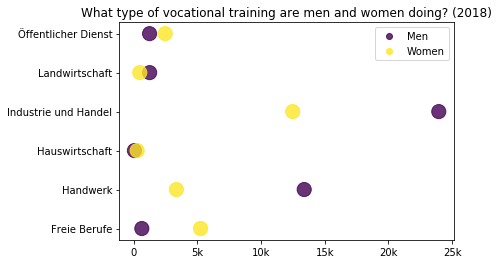

In [92]:
#voc_training_long=voc_training_long.reset_index()
area_gender=voc_training_long.loc[voc_training_long['year']==18]
area_gender=area_gender.groupby(['Ausbildungsbereich', 'Geschlecht'])[['Anzahl']].sum()
area_gender.head()

area_gender=area_gender.reset_index()
area_gender.head()

#Unique values in 'Geschlecht'column and their indices on first occurence 
labels, index = np.unique(area_gender["Geschlecht"], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(area_gender['Anzahl'], area_gender['Ausbildungsbereich'], marker = 'o', c = index, alpha = 0.8, s=200)
ax.legend(sc.legend_elements()[0], ['Men', 'Women'])
plt.xticks([0, 5000, 10000, 15000, 20000, 25000], ('0', '5k', '10k', '15k', '20k', '25k'))
plt.title('What type of vocational training are men and women doing? (2018)')
plt.show()
